In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from ParticleFilter import sample_normal_model, normal_model_pdf, particle_filter, single_step_particle_filter
from static_beacons_model import agent_transition_model_template ,becon_transition_model_template, agent_measurement_model_template, measurement_likelihood_template, generate_agent_data
from files_handlers import save_experiment_setup
from static_sim import particle_filter_simulation, plot_and_save_stats
import sys
import time
import os

In [2]:
# problem parameters

beacons_pos = 10
beacons = beacons_pos*np.array([[1, 1], [-1, -1], [-1, 1], [1, -1]])
x0 = np.array([0, 0])
sigma_transition = 0.5
sigma_measurement = 0.1
stepsize = 2
n_steps = 50
note = ''
# model definition
cov_measurement = (sigma_measurement**2)*np.eye(4)
cov_transition_agent = (sigma_transition**2)*np.eye(2)

agent_transition_model = lambda x, u: x + sample_normal_model(u, cov)
becons_transition_model = lambda becons, u: becons
agent_measurement_model = lambda x : agent_measurement_model_template(x, beacons, sigma_measurement)
measurement_likelihood = lambda z, x : measurement_likelihood_template(z, x, beacons, cov_measurement)

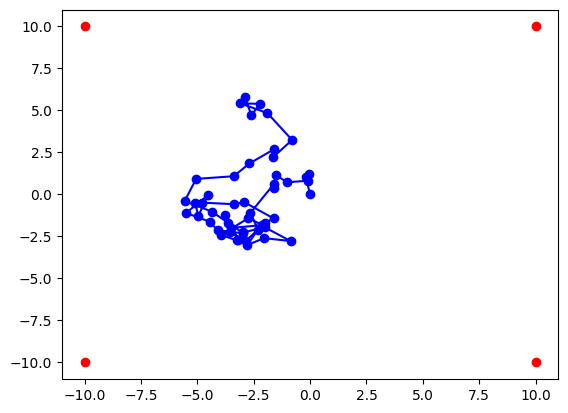

In [3]:
# create ground truth
x, z, u_agent = generate_agent_data(n_steps, stepsize, x0, agent_measurement_model, agent_transition_model)

# plot ground truth
plt.figure()
plt.plot(x[:, 0], x[:, 1], 'bo-')
plt.plot(beacons[:, 0], beacons[:, 1], 'ro')
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


49/50results/20240508/exp_20240508_102357_p_1000_s_50_rsm_systematic


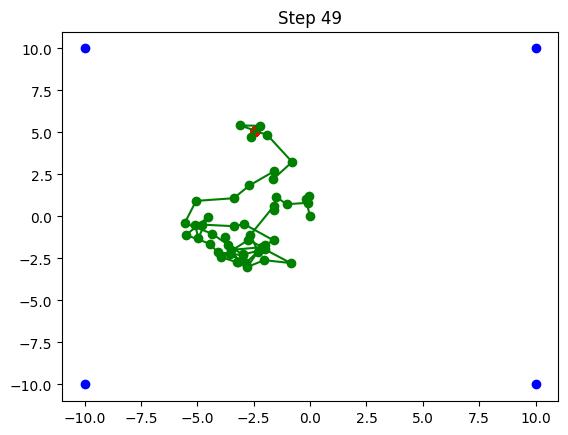

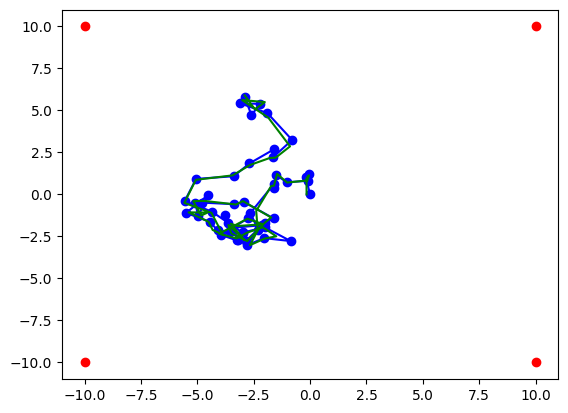

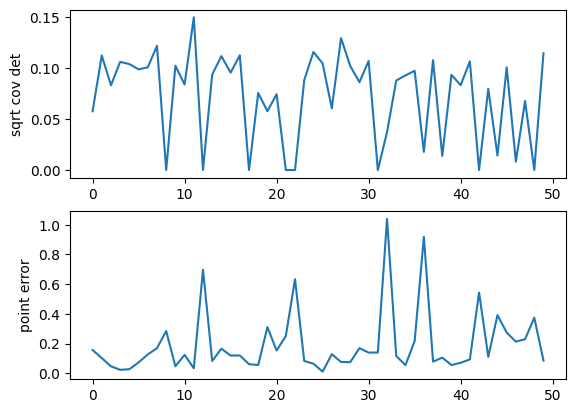

In [4]:
# systematic
n_particles = 1000
resample_method='systematic'
systematic_folder_name = save_experiment_setup(n_particles, n_steps, resample_method, note, beacons_pos, sigma_transition, sigma_measurement, stepsize, x, z)
dict_stats = particle_filter_simulation(n_steps, n_particles, beacons, x, u_agent, z, agent_transition_model, measurement_likelihood, resample_method, systematic_folder_name)
plot_and_save_stats(x, beacons, dict_stats, systematic_folder_name)

MovieWriter imagemagick unavailable; using Pillow instead.


49/50results/20240508/exp_20240508_102431_p_1000_s_50_rsm_stratified


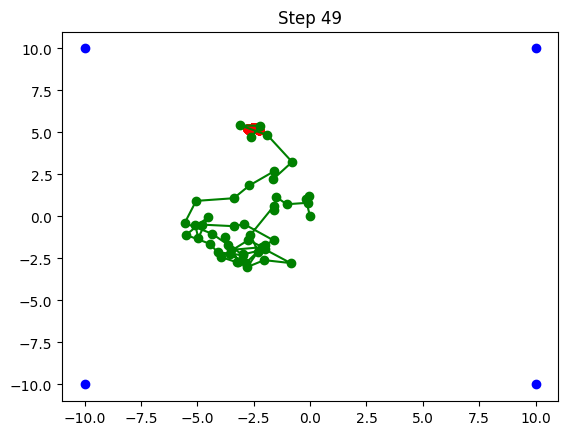

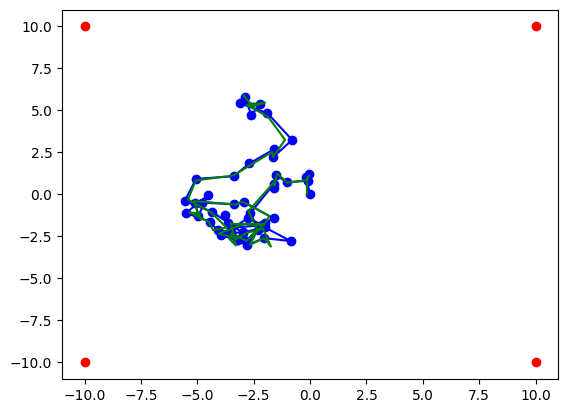

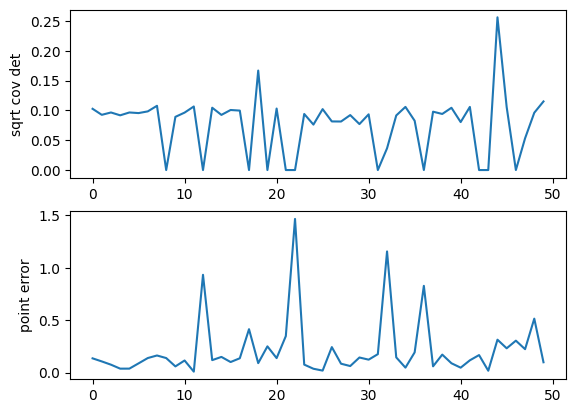

In [5]:
n_particles = 1000
resample_method='stratified'
stratified_folder_name = save_experiment_setup(n_particles, n_steps, resample_method, note, beacons_pos, sigma_transition, sigma_measurement, stepsize, x, z)
dict_stats = particle_filter_simulation(n_steps, n_particles, beacons, x, u_agent, z, agent_transition_model, measurement_likelihood, resample_method, stratified_folder_name)
plot_and_save_stats(x, beacons, dict_stats, stratified_folder_name)

MovieWriter imagemagick unavailable; using Pillow instead.


49/50results/20240508/exp_20240508_102459_p_1000_s_50_rsm_multinomial


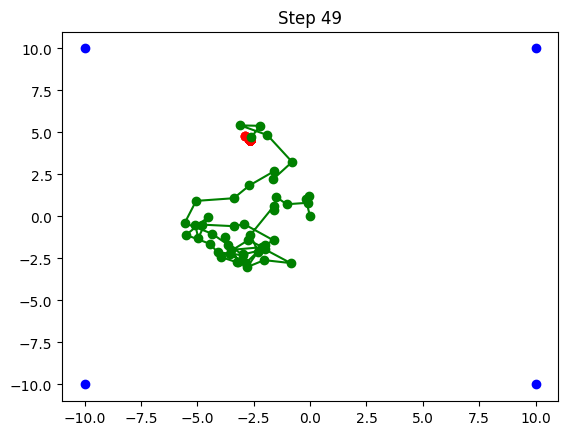

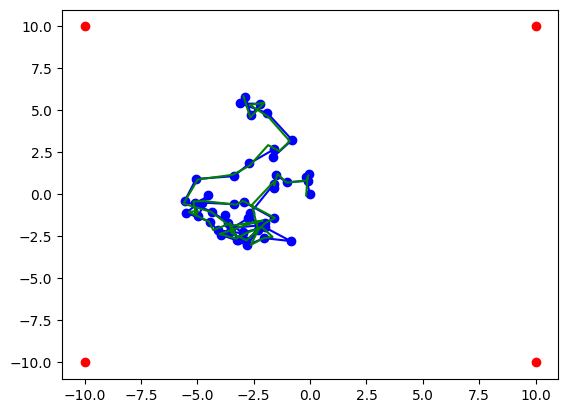

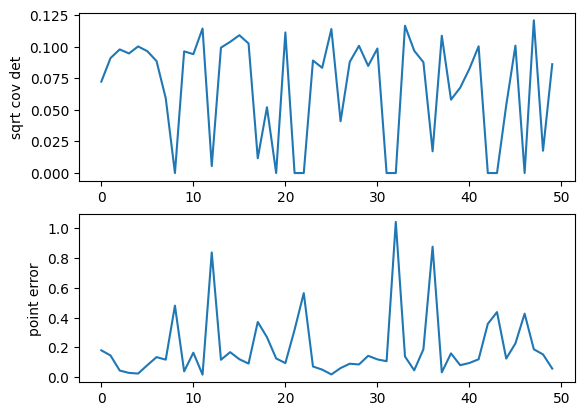

In [6]:
n_particles = 1000
resample_method='multinomial'
multinomial_folder_name = save_experiment_setup(n_particles, n_steps, resample_method, note, beacons_pos, sigma_transition, sigma_measurement, stepsize, x, z)
dict_stats = particle_filter_simulation(n_steps, n_particles, beacons, x, u_agent, z, agent_transition_model, measurement_likelihood, resample_method, multinomial_folder_name)
plot_and_save_stats(x, beacons, dict_stats, multinomial_folder_name)